In [83]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [84]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Cleaning

In [87]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [88]:
df = df.drop_duplicates()

In [89]:
df.shape

(302, 14)

# Integration

In [90]:
subset1 = df[['age','cp','chol','thalachh']]
subset2 = df[['exng','slp','output']]

In [91]:
df_merged = subset1.merge(right=subset2,how='cross')

In [92]:
df_merged

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,63,3,233,150,0,0,1
2,63,3,233,150,0,2,1
3,63,3,233,150,0,2,1
4,63,3,233,150,1,2,1
...,...,...,...,...,...,...,...
91199,57,1,236,174,1,1,0
91200,57,1,236,174,0,1,0
91201,57,1,236,174,0,1,0
91202,57,1,236,174,1,1,0


# Error Correction

In [93]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q2 = column.quantile(0.75)
    IQR = Q2 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q2 + threshold)
    return column[~outlier_mask]

In [94]:
col_name = ['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
    df[col] = remove_outliers(df[col])

C:\Users\kulka\AppData\Local\Temp/ipykernel_14980/501543534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = remove_outliers(df[col])


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

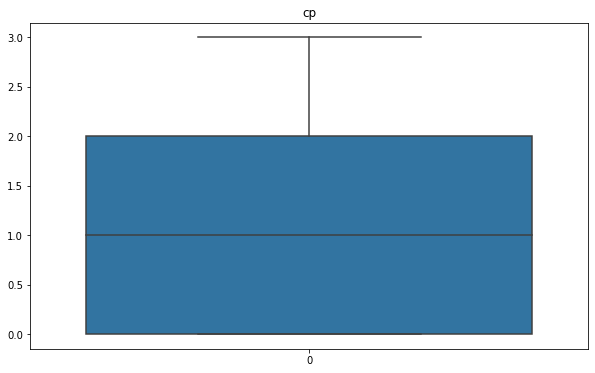

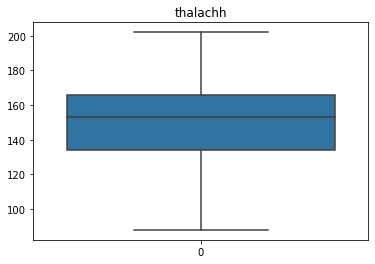

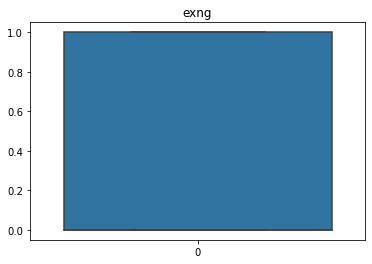

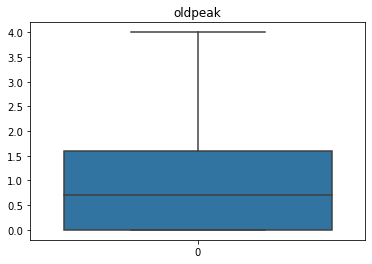

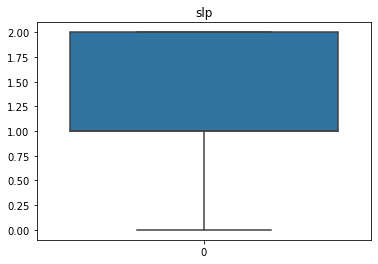

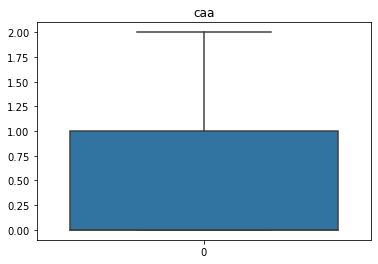

In [96]:
plt.figure(figsize=(10,6))

for col in col_name:
    sns.boxplot(data = df[col])
    plt.title(col)
    plt.show()

In [97]:
df = df.dropna()

In [98]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [99]:
df = df.drop('fbs',axis=1)

Correlation With the Target:
age        -0.193798
sex        -0.303271
cp          0.410807
trtbps     -0.135238
chol       -0.052796
restecg     0.122071
thalachh    0.384609
exng       -0.444401
oldpeak    -0.437895
slp         0.329432
caa        -0.460816
thall      -0.366390
Name: output, dtype: float64



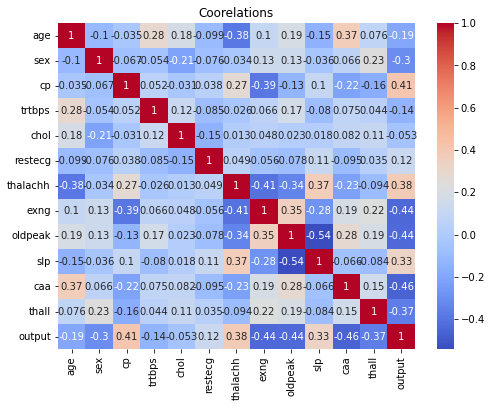

In [100]:
correlations = df.corr()['output'].drop('output')

print("Correlation With the Target:")
print(correlations)
print()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Coorelations')
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
x = df[['cp','thalachh','exng','oldpeak','slp','caa']]
y = df.output
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((220, 6), (220,), (55, 6), (55,))

# Transformation

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Data Model Building

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [106]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [107]:
y_train.shape,y_test.shape

((220, 1), (55, 1))

In [108]:
model = LogisticRegression()

In [110]:
model.fit(x_train_scaled,y_train)

C:\Users\kulka\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [111]:
y_pred = model.predict(x_test_scaled)

In [115]:
acc = accuracy_score(y_pred,y_test)
print("Accuracy Score: ",acc)
print("Confusion Matrix: ",confusion_matrix(y_pred,y_test))

Accuracy Score:  0.8545454545454545
Confusion Matrix:  [[20  1]
 [ 7 27]]
